# 1. 함수, 미적분Function, Calculus - 1/3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

## 함수

### 스칼라<sup>scalar</sup>, 벡터<sup>vector</sup><sup>[1]</sup>

- #### 스칼라 

    - 양만으로 표현할 수 있는 물리량, 수학적으로는 숫자 하나

    - 예 : 온도

- #### 벡터

    - 양과 방향으로 표현할 수 있는 물리량

    - 예 : 속도

    - 3차원 벡터의 예 : $\mathbf{v} = (2, 3, 4)^{\text{T}}$

    - 머신러닝에서는 n차원 벡터를 다룸

### 함수의 정의

- 첫 번째 집합의 임의의 한 원소를 두 번째 집합의 오직 한 원소에 대응시키는 대응 관계<sup>[2]</sup>

- 표기 1. $f : X \to Y$, $X$:정의역<sup>domain</sup>, $Y$:공역<sup>codomain</sup>

- 표기 2. $f(X) = Y$

- 실수 집합 $\mathbb{R}$로 쓸 때 $f:\mathbb{R} \to \mathbb{R}$는 실수를 실수로 대응시키는 함수 예: $f:x \to x^2$

- $f:\mathbb{R}^2 \to \mathbb{R}$, $f: (x_1, x_2) \to x_1 + x_2$

- 입력되는 변수 : 독립변수, 출력되는 변수 : 종속변수
<table>
<tr><td>
<img src="01-function/Function_machine2.svg.png" width="300">
</td></tr>
<tr><td>
<span class="fig-title">https://en.wikipedia.org/wiki/Function_(mathematics)#/media/File:Function_machine2.svg</span>
</td></tr>
</table>

- 사랑의 작대기(?) 와 같은 성질

<table>
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Injection.svg/220px-Injection.svg.png"/></td>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Surjection.svg/220px-Surjection.svg.png"/></td>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Bijection.svg/220px-Bijection.svg.png"/></td>
</tr>
<tr><td>일대일 함수(단사함수)</td><td>전사함수</td><td>일대일 대응함수(전단사함수)</td></tr>
<tr><td></td><td></td><td>https://ko.wikipedia.org/wiki/함수 public domain</td></tr>
</table>

### 함수의 그래프

- 독립변수와 종속변수의 관계를 그림으로 표현

- 일반적으로 3변수 음함수 표현까지만 가능


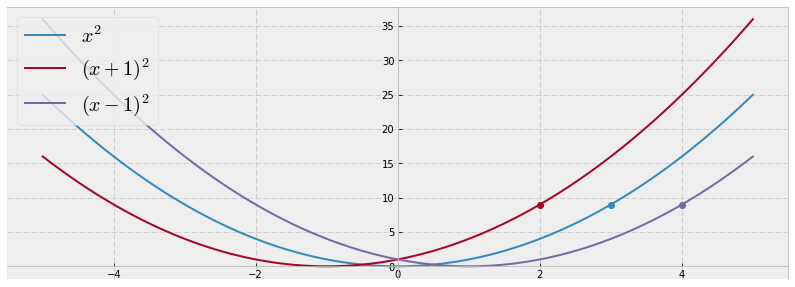

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,5)

fig, ax = plt.subplots()

x = np.linspace(-5, 5, 100)
y1 = x**2
y2 = (x+1)**2
y3 = (x-1)**2

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.plot(x, y1, label=r"$x^2$")
ax.plot(x, y2, label=r"$(x+1)^2$")
ax.plot(x, y3, label=r"$(x-1)^2$")

ax.plot(3, 9, 'o', color=style_colors[0])
ax.plot(2, 9, 'o', color=style_colors[1])
ax.plot(4, 9, 'o', color=style_colors[2])

ax.legend(loc="upper left", fontsize=20);

- 위 그래프는 $x$축에서 하나의 값을 선택했을 때 그 선택된 $x^*$의 제곱한 값과 같은 $y$값에 점을 찍어 그린것이다.

- 파란점은 $y=x^2$인 관계에서 $y=9$와 같아지는 $x$가 이루는 위치에 찍힌 점

- $y = (x+1)^2$인 관계에서  $y=9$와 같아지는 $x$는 3보다 작은 값 $\to$ 그래프가 왼쪽으로 이동

- $y = (x-1)^2$인 관계에서  $y=9$와 같아지는 $x$는 3보다 큰 값 $\to$ 그래프가 오른쪽으로 이동

### 함수의 합성

- 함수 $f:X \to Y$의 공역과 함수 $g : Y \to Z$의 정의역이 같다고 할 때 다음과 같이 정의된 함수 $ g \circ f$를 두 함수 $f$와 $g$의 합성이라고 한다.

- 또는 다음처럼 표기하기도 함 $g(f(X))$

- 쉽게 $f$의 출력이 $g$의 입력으로 들어감

- 뉴럴네트워크의 레이어의 출력이 다음 레이어의 입력으로 들어가는 개념과 동일

#### 함성함수의 성질(참고)$\dagger$

- 교환법칙 성립하지 않음 $f \circ g \ne g \circ f$

- 결합법칙 성립 $h \circ (g \circ f) = (h \circ g) \circ f$

- $f: X \to Y$이고 $I_{X} : X \to X$, $I_{Y} : Y \to Y$가 항등함수일 때 $f \circ I_{X} = f$, $I_Y \circ f = f$ 


- $ f : x \to 2x$, $g : x \to x^2 +1 $ 일때 

$$ 
g \circ f = g(f(x)) = (2x)^2 + 1 = 4 x + 1
$$

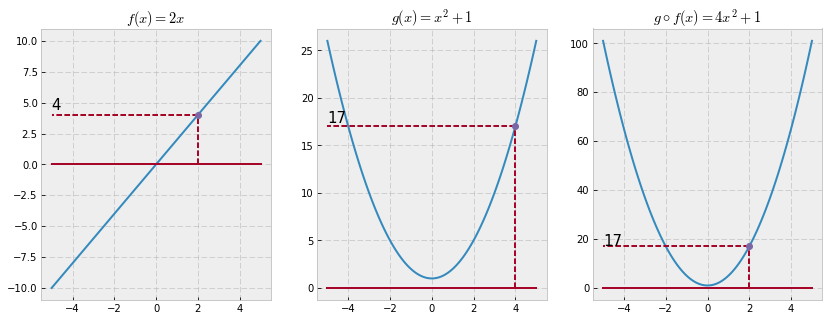

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,5)

x = np.linspace(-5, 5, 100)

f = lambda x : 2*x
g = lambda x : x**2 + 1
gf = lambda x : (2*x)**2 + 1

fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(x, f(x))
ax1.plot(x, np.zeros(x.shape[0]))
ax1.set_title('$f(x)=2x$')

ax2.plot(x, g(x))
ax2.plot(x, np.zeros(x.shape[0]))
ax2.set_title('$g(x)=x^2 + 1$')

ax3.plot( x, g(f(x)) )
ax3.plot(x, np.zeros(x.shape[0]))
ax3.set_title('$g \circ f(x)=4x^2 + 1$')

x0 = 2
ax1.plot((x0, x0), (0, f(x0)), '--', color=style_colors[1])
ax1.plot((x0, -5), (f(x0), f(x0)), '--', color=style_colors[1])
ax1.plot(x0, f(x0), 'o')
ax1.text(-5, f(x0)+0.4, "{}".format(f(x0)), fontsize=15)

ax2.plot((f(x0), f(x0)), (0, g(f(x0))), '--', color=style_colors[1])
ax2.plot((f(x0), -5), (g(f(x0)), g(f(x0))), '--', color=style_colors[1])
ax2.plot(f(x0), g(f(x0)), 'o')
ax2.text(-5, g(f(x0))+0.4, "{}".format(g(f(x0))), fontsize=15)

ax3.plot((x0, x0), (0, gf(x0)), '--', color=style_colors[1])
ax3.plot((x0, -5), (gf(x0), gf(x0)), '--', color=style_colors[1])
ax3.plot(x0, gf(x0), 'o')
ax3.text(-5, gf(x0)+0.4, "{}".format(gf(x0)), fontsize=15);

### 역함수

- $f : X \to Y$ 일 때 $g: Y \to X$인 함수가 있어서 $f(x)=y$일 때 $g(y)=x$를 만족하는 함수

- $f$의 역함수가 존재할 필요충분조건 : $f$가 일대일 대응함수

- 표기법 : $f^{-1} : Y \to X, x = f^{-1}(y)$

- 함수와 그의 역함수의 그래프는 $y = x$에 대칭 : 지수함수와 로그함수 그래프로 확인

#### 역함수의 성질(참고)$\dagger$

- 역함수의 역함수는 자기 자신

$$
\left( f^{-1} \right)^{-1} = f
$$

- 역함수와의 합성함수는 항등함수

$$
\left( f^{-1} \circ f \right)(x) = f^{-1} \left( f(x) \right) =f^{-1}(y) = x \\[5pt]
\left( f \circ f^{-1} \right)(y) = f \left( f(y)^{-1} \right) =f(x) = y 
$$

- 두 함수 $f:X \to Y$, $g:Y \to X$에 대해서 두 함수의 합성함수가 항등함수이면 역함수

$$
(f \circ g)(y)= y \implies g=f^{-1}, f = g^{-1} \\[5pt]
(g \circ f)(x)= x \implies g=f^{-1}, f = g^{-1}
$$

- 두 함수 $f:X \to Y$, $g:Y \to Z$가 일대일 대응함수여서 그 역함수가 $f^-1(y)$, $g^{-1}(x)$일 때

$$
\begin{align}
\left( f^{-1} \circ g^{-1} \right) \circ \left( g \circ f \right) 
&=  f^{-1} \circ \left(g^{-1}  \circ  g  \right) \circ f \\[5pt]
&= f^{-1} \circ I_{Y} \circ f \\[5pt]
&= f^{-1} \circ f = I_X
\end{align}
$$

$$
\begin{align}
\left( g \circ f \right) \circ \left( f^{-1} \circ g^{-1} \right) 
&=  g \circ \left(f  \circ  f^{-1}  \right) \circ g^{-1} \\[5pt]
&= g \circ I_{Y} \circ g^{-1} \\[5pt]
&= g \circ g^{-1} = I_Z
\end{align}
$$

$$
\left( g \circ f \right)^{-1} = \left( f^{-1} \circ g^{-1} \right) 
$$




### 함수의 종류<sup>[3]</sup>

- 위 소개한 스칼라, 벡터에 대해서 머신러닝에서 주로 다루는 함수들이 어떤 함수들인지 중심으로 간단히 살펴봄

#### 일변수-실함수univariable scalar function
#### 다변수-실함수multivariable scalar function
#### 일변수-벡터함수univariable vector function
#### 다변수-벡터함수multivariable vector function

### 일변수-실함수univariable scalar function

- $y = f(x) \qquad f:\mathbb{R} \to \mathbb{R}$

- 고등학교때 많이 봤던 우리가 익히 알고 있는 함수

- **다항함수**, 분수함수, **지수함수**, **로그함수**, 삼각함수

- $f(x) = x^2$

#### 지수 함수

- 머신러닝에 자주 등장하는 대표적인 일변수-실함수인 지수, 로그 함수를 간단히 정리

- 지수함수
$$ y = a^x \qquad a>0, a \ne 1$$

- 그래프는 $a$에 따라 달라짐

- $a>1$: 양의 방향으로 증가, $0<a<1$: 양의 방향으로 감소

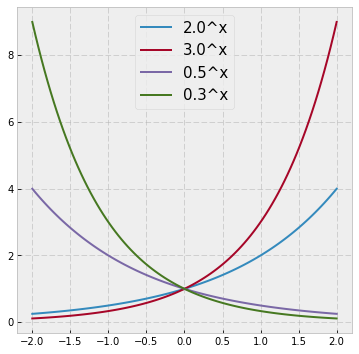

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)

x = np.linspace(-2, 2, 100)
A = [2, 3, 1/2, 1/3]

for a in A :
    plt.plot(x, a**x, label='{:.1f}^x'.format(a)) 
   
plt.legend(fontsize=15);

#### 몇가지 지수법칙(참고)
$$
\begin{align}
& a^m a^n = a^{m+n} \\[5pt]
& a^m \div a^n = a^{m-n}\\[5pt]
& \left(a^m\right)^n = a^{mn} \\[5pt]
& \left(ab\right)^m = a^{m}b^{m} \\[5pt]
& a^0 = 1\\[5pt]
& a^{-m}=\frac{1}{a^m} \qquad \because a^m a^{-m} = a^{m+(-m)} = a^0 = 1
\end{align}
$$

#### 무리수 e

$$
\lim_{x \to 0} \left(1+x\right)^{\frac{1}{x}} = e = 2.718...
$$

$$
\lim_{x \to \infty} \left(1+\frac{1}{x}\right)^{x} = e = 2.718...
$$

/home/metamath/lang/python/py3/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/metamath/lang/python/py3/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


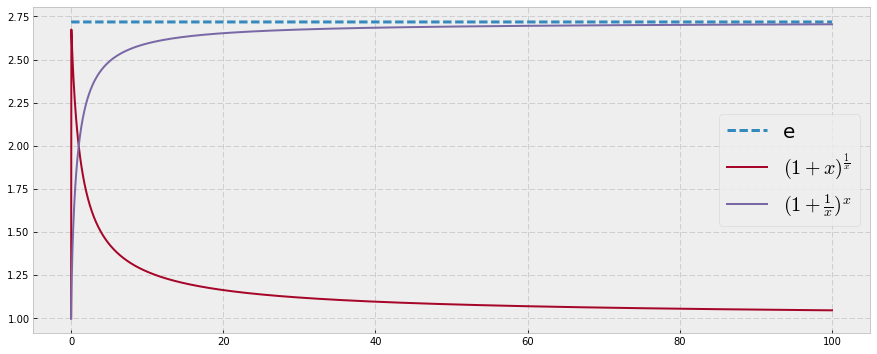

In [21]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,6)

x = np.linspace(0, 100, 3000)

e1 = (1+x)**(1/x)
e2 = (1+(1/x))**x

plt.plot(x, np.ones(x.shape)*np.e, '--', label="e", lw=3)
plt.plot(x, e1, label=r"$(1+x)^{\frac{1}{x}}$", lw=2)
plt.plot(x, e2, label=r"$(1+\frac{1}{x})^x$", lw=2)
plt.legend(fontsize=20)


#### 로그 함수

- 로그 정의

$$
\log_{a} x = c
$$

- 로그는 숫자, 위 식에서 $a$를 $x$로 만들기 위해 $a$의 어깨위에 거듭 제곱 되어야 하는 숫자가 로그 

$$ a^c = x$$

- 따라서 정의대로 써보면 

$$
a^{\log_a x} = x
$$

- $x$를 바꿔가면서 함수처럼 생각해볼 수 있다.

- 자연로그 : 특히 $a$가 $e$인 경우 $\log_{e}$를 $\ln$으로 표시

- 식을 보면 로그의 출력이 지수식의 입력으로 들어가고 지수식의 출력이 로그의 입력으로 $\implies$ 역함수 관계

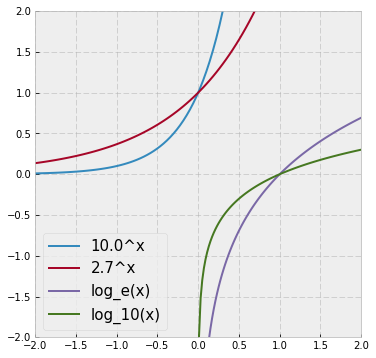

In [6]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (6,6)

x = np.linspace(-2, 2, 100)
x2 = np.linspace(0.01, 2, 100)

A = [10, np.e]

for a in A :
    plt.plot(x, a**x, label='{:.1f}^x'.format(a)) 

plt.plot(x2, np.log(x2), label='log_e(x)')
plt.plot(x2, np.log10(x2), label='log_10(x)')
    
plt.legend(fontsize=15)
plt.axis('equal')

plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-2, 2);

#### 로그의 성질(참고)

- $ \log_a 1 = 0, \log_a a = 1$ : $a^{\log_{a} 1} = 1$, $a^{\log_{a} a} = a$

- $ \log_a M N = \log_a M + \log_a N$

$\log_a M N$은 $a$를 $MN$으로 만들기 위해 어깨위에 올라가는 수
$$
a^{\log_{a} MN} = MN \\[5pt]
a^{\log_{a} M } = M , \quad a^{\log_{a} N} = N \\[5pt]
a^{\log_{a} M } \cdot a^{\log_{a} N } = MN  \\[5pt]
a^{\log_{a} M + \log_{a} N} = MN
$$

- $ \log_a \frac{M}{N} = \log_a M - \log_a N$

- $ \log_a M^k = k \log_a M$

- $\log_a b = \dfrac{\log_c b}{\log_c a}$

로그의 정의의 대로 써주면 

$$
\begin{align}
& a^{\log_a b} =  b \\[5pt]
& \log_c \left( a^{\log_a b} \right) = \log_c b \\[5pt]
& (\log_a b)\log_c a = \log_c b \quad \because \log_a M^k = k \log_a M \\[5pt]
& \log_a b = \frac{\log_c b}{\log_c a} \quad \because \log_c a \ne 0
\end{align}
$$

- 어떤 함수의 극점의 위치를 변화시키지 않는다.

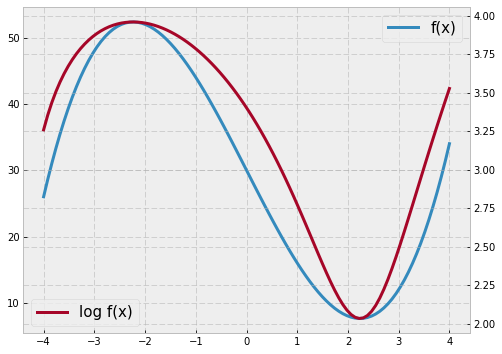

In [7]:
%matplotlib inline 

plt.rcParams["figure.figsize"] = (8,6)

x = np.linspace(-4, 4, 100)
y = x**3 - 15*x + 30 

fig, ax1 = plt.subplots(1, 1)
ax1.plot(x,y, lw=3, label="f(x)", color=style_colors[0])
ax1.legend(loc=1, fontsize=15)

ax2 = ax1.twinx()
ax2.plot(x, np.log(y), lw=3, label="log f(x)", color=style_colors[1])
ax2.legend(loc=3, fontsize=15);

### 다변수-실함수multivariable scalar function

- $z = f(x, y)  \qquad f:\mathbb{R}^2 \to \mathbb{R}$

- 가장 자주 보게 될 함수

- 스칼라장<sup>scalar field</sup>를 정의한다고 말한다.

- 공간의 온도장(온도분포), 대기의 기압장(기압분포), 하지만 우리는 물리적 의미는 생각하지 않음

- $f(\mathbf{x}) = f(x_1, x_2) = 2x_1 + 3x_2 - x^{3}_{1} - 2x^{2}_{2} $ 

- 공간에서의 유클리드 거리 $f(\mathbf{p};\mathbf{p}_0) = f(x,y,z;x_0,y_0,z_0) = \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2}$ 

- **우리에게 가장 중요한 예는 목적함수<sup>objective function</sup>, 코스트함수<sup>cost function</sup>**

$$
C(\mathbf{w}) = \frac{1}{2N} \sum_{i=1}^{N} \lVert y(\mathbf{x}_i;\mathbf{w}) - t \rVert^2
$$

- 결합확률밀도함수

$$
f(x,y) = \begin{cases}
\frac{12}{5} x (2 -x -y), & 0 < x < 1, 0 < y <1 \\
0, & \text{otherwise}
\end{cases}
$$

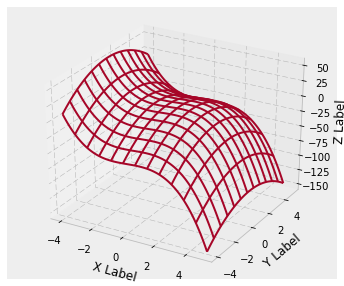

In [10]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (13,5)

# 데이터 준비
x1 = x2 = np.arange(-4.0, 5.0, 0.05)
X1, X2 = np.meshgrid(x1, x2)

Z = 2*X1 + 3*X2 - X1**3 - 2*X2**2

fig = plt.figure()

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X1, X2, Z,rstride=15, cstride=15, color=style_colors[1])
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label');

#ax2 = fig.add_subplot(122)
#CS = ax2.contourf(X1, X2, Z, 10, cmap=plt.cm.bone)

#### 양함수와 음함수<sup>[4]</sup>

- 2변수 실함수에서의 양함수와 음함수 : $z = f(x,y)$ 와  $f(x,y) = 0$

- 3변수 실함수에서의 양함수와 음함수 : $w = f(x,y,z)$ 와 $f(x,y,z) = 0$

- 뭐가 어떻게 다른지 그림으로 확인해보기

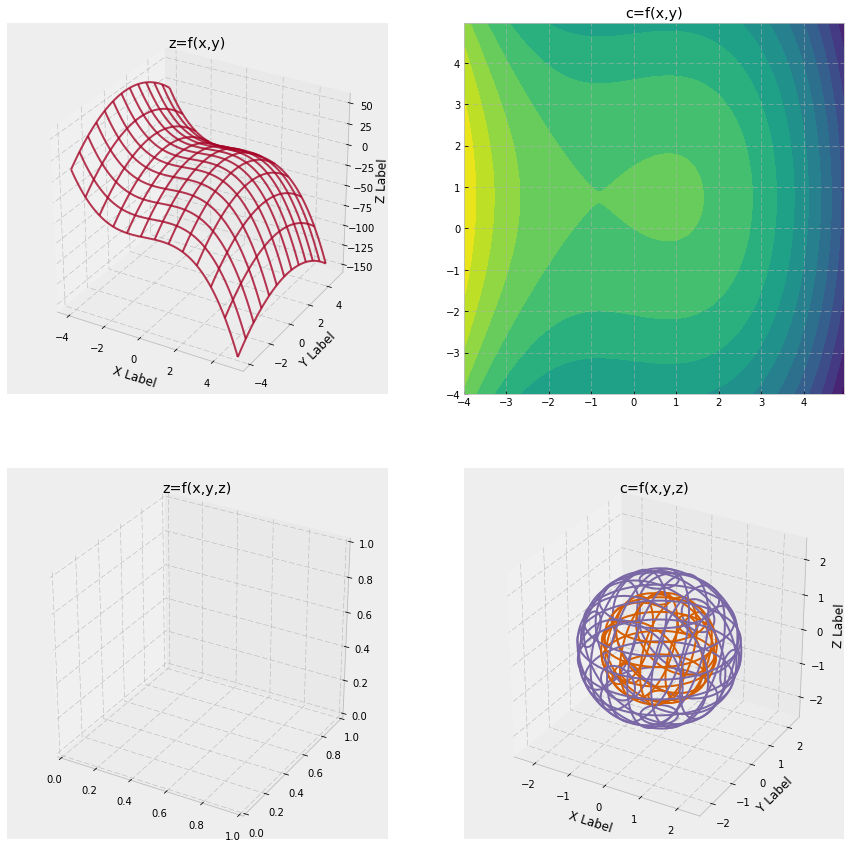

In [10]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (15,15)

# https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d
def plot_implicit(fn, level, fig, loc=111, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==level)
    bbox ..the x,y,and z limits of plotted interval
    '''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    
    ax = fig.add_subplot(loc, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 10)  # number of slices
    A1,A2 = np.meshgrid(A,A)         # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z, level)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', linestyles='solid', colors=style_colors[4])
        Z = fn(X,Y,z, level+2)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', linestyles='solid', colors=style_colors[2])
        # [z] : 스트라이드를 나타내며 여기서는 숫자 하나가 들어가니가 한번에 한 슬라이스만 그림

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z, level)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', linestyles='solid', colors=style_colors[4])
        Y = fn(X,y,Z, level+2)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', linestyles='solid', colors=style_colors[2])

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z, level)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x', linestyles='solid', colors=style_colors[4])
        X = fn(x,Y,Z, level+2)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x', linestyles='solid', colors=style_colors[2])

    
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    ax.set_title('c=f(x,y,z)')

def sphere(x,y,z, a):
    return x**2 + y**2 + z**2 - a

# 데이터 준비
x1 = x2 = np.arange(-4.0, 5.0, 0.05)
X1, X2 = np.meshgrid(x1, x2)

Z = 2*X1 + 3*X2 - X1**3 - 2*X2**2

fig = plt.figure()

ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_wireframe(X1, X2, Z,rstride=15, cstride=15, color=style_colors[1], alpha=0.8)
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')
ax1.set_title('z=f(x,y)')

ax2 = fig.add_subplot(222)
ax2.contourf(X1, X2, Z, 15)
ax2.set_title('c=f(x,y)')

ax3 = fig.add_subplot(223, projection='3d')
ax3.set_title('z=f(x,y,z)')

plot_implicit(sphere, 2, fig, 224)

#plt.show()

### 일변수-벡터함수univariable vector function

- $\mathbf{r}(t) = (x(t), y(t), z(t))$

- 평면 또는 공간에 존재하는 곡선

- $f\left(x(t), y(t), z(t) \right) = \left(\sin(6t), \frac{1}{4}t, \frac{t^2}{2} \right)^{\text{T}}$

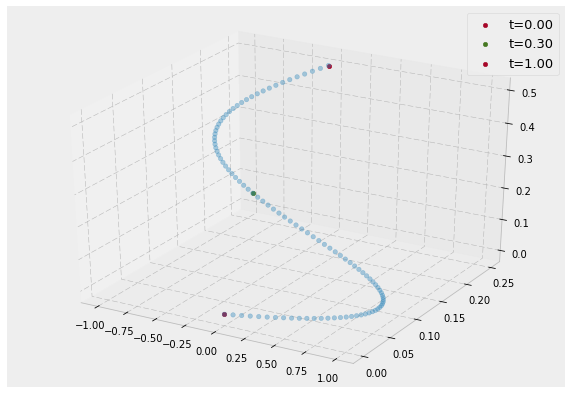

In [8]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (10,7)

t = np.linspace(0, 1, 100)

x = np.sin(6*t)
y = 1/4*t
z = t**2/2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, '.', alpha=0.4)
ax.scatter(x[0],  y[0],  z[0], 'o', color=style_colors[1], label="t={:.2f}".format(t[0]))
ax.scatter(x[60], y[60], z[60], 'o', color=style_colors[3], label="t={:.2f}".format(t[30]))
ax.scatter(x[-1], y[-1], z[-1], 'o', color=style_colors[1], label="t={:.2f}".format(t[-1])) 

ax.legend(fontsize=13);


### 다변수-벡터함수multivariable vector function

- 파라메트릭 표현<sup>parametric representation</sup>으로 3차원에 존재하는 곡면<sup>[5]</sup>

$$
\mathbf{r}(u,v) = \left( x(u, v), y(u, v), z(u, v) \right)^{\text{T}} \qquad \mathbb{R}^2 \to \mathbb{R}^3
$$

- 예<sup>[5]</sup> : $\mathbf{r}(u,v) = (\cos u \sin v , \sin u \sin v , \cos v)^{\text{T}} \qquad 0 \le u \le 2\pi, \quad 0 \le v \le \pi$

- 곡면에서의 법선벡터장<sup>normal vector field</sup>


$$
\mathbf{n}(t, s) = \frac{\dfrac{\partial \mathbf{r}}{\partial t} \times \dfrac{\partial{\mathbf{r}}}{\partial s}}{\lvert \mathbf{n} \rvert} \qquad \mathbb{R}^3 \to \mathbb{R}^3 
$$

- 예<sup>[6]</sup> : 곡면 $ \mathbf{r}(t, s) =  (t+1, s, s^2-t^2 +1)^{\text{T}}$의 법선 벡터장

-  **소프트맥스 활성함수<sup>softmax activation function</sup>**

$$
\sigma : \mathbb{R}^{K} \to [0,1]^{K} \\[5pt]
\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}
$$

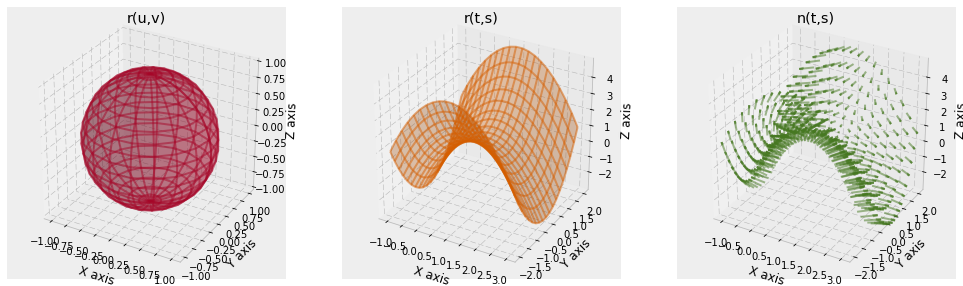

In [9]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (17,5)
# plt.rcParams["figure.figsize"] = (10,3) #for notebook mode

u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)

# parametric vector valued vector function
U,V = np.meshgrid(u,v)
X = np.cos(U)*np.sin(V)
Y = np.sin(U)*np.sin(V)
Z = np.cos(V)

fig = plt.figure()
ax1 = fig.add_subplot(131, projection='3d')

ax1.plot_surface(X,Y,Z,  alpha=0.3, color=style_colors[1])
ax1.plot_wireframe(X,Y,Z,  alpha=0.5, color=style_colors[1])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('r(u,v)')

# unit vector field
t = np.linspace(-2, 2, 20)
s = np.linspace(-2, 2, 20)

T, S = np.meshgrid(t, s)
X, Y, Z = T+1, S, S**2-T**2+1
Nx, Ny, Nz = 2*T, -2*S, np.ones(T.shape) #법선 벡터장 eq()

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X,Y,Z, alpha=0.3, color=style_colors[4])
ax2.plot_wireframe(X,Y,Z, alpha=0.5, color=style_colors[4])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('r(t,s)')

ax3 = fig.add_subplot(133, projection='3d')
ax3.quiver(X,Y,Z, Nx,Ny,Nz, length=0.5, normalize=True, color=style_colors[3], alpha=0.5)
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.set_title('n(t,s)');

In [13]:
z = np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])
exp_z = np.exp(z)
print("input vector z : {}".format(exp_z))

sum_exp_z = exp_z.sum()
print("sum exp(z)     : {}".format(sum_exp_z))

softmax = exp_z / sum_exp_z
print("softmax(z)     : {}".format(softmax))
print("sum softmax(z) : {:.2f}".format(softmax.sum()))

input vector z : [  2.7183   7.3891  20.0855  54.5982   2.7183   7.3891  20.0855]
sum exp(z)     : 114.98389973429897
softmax(z)     : [ 0.0236  0.0643  0.1747  0.4748  0.0236  0.0643  0.1747]
sum softmax(z) : 1.00


## 참고문헌

1. Scalars and Vectors, http://www.physicsclassroom.com/class/1DKin/Lesson-1/Scalars-and-Vectors

2. https://ko.wikipedia.org/wiki/함수

3. 벡터 미적분학, 곽도영,서동엽,임진환,진교택, 경문사

4. https://ko.wikipedia.org/wiki/음함수와_양함수

5. Surface Modeling for CAD/CAM - Advanced in Industrial Engineering, Byoung K. Choi, Elsevier

6. Unit normal vector of a surface, https://www.khanacademy.org/math/multivariable-calculus/integrating-multivariable-functions/flux-in-3d-articles/a/unit-normal-vector-of-a-surface

7. Derivative#Notation_(details): https://en.wikipedia.org/wiki/Derivative

8. Thomas' Calculus, Giordano, Weir, Finney, Pearson

9. Riemann 합의 3D 시각화, https://www.wolfram.com/mathematica/new-in-8/new-and-improved-scientific-and-information-visualization/visualize-3d-riemann-sums.html

10. Jacobian matrix and determinant, https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant

11. 벡터, 행렬에 대한 미분Derivatives for vectors and matrices, https://metamath1.github.io/2018/01/02/matrix-derivatives.html

12. 행렬식의 기하학적 의미 , https://wikidocs.net/4049

13. Finite Elements vol.1 An Introduction, Eric B. Becker, Graham F. Carey, J. Tinsley Oden, Prentice-Hall

14. The Jacobian matrix, Khan Academy, https://youtu.be/bohL918kXQk?t=1m15s


In [2]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    table { font-family: 'Noto Sans KR' !important;  font-size: 13pt !important; }     
    p  { font-family: 'Georgia','Nanum Myeongjo'; /*font-size: 12pt;*/ line-height: 200%;  text-indent: 10px; }
    li { font-family: 'Georgia','Nanum Myeongjo'; /*font-size: 12pt;*/ line-height: 200%; }
    li > p { text-indent: 0px; }
    /* blockquote > p { font-family: 'Georgia','Nanum Myeongjo' !important; font-size: 12pt !important; } */
    sup { font-family: 'Georgia'; } 
    code, pre { font-family: 'Nanum Gothic Coding' !important; }
    .code-body { font-family: 'Nanum Gothic Coding'; }
    .ns { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .fig-title { font-family: 'Noto Sans KR'; font-size: 10pt;}
    .summary {font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
              border-left:3px solid #FF0000;padding-left:20px;margin-top:10px; }
</style>